In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from matplotlib.colors import Normalize, ListedColormap
from matplotlib.cm import ScalarMappable

# First iteration for getting the embedding

In [6]:
embedding_vectors = np.load("../embedding_vectors.npy") # See the notebook in sourceing the data

## t-SNE

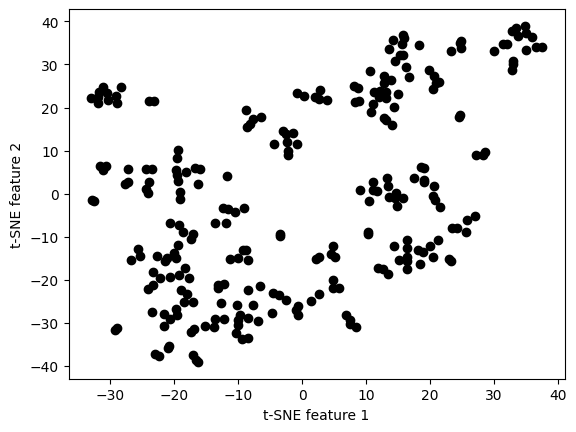

In [11]:
def tsne_plot(embedding_dataset, perplexity=30.0, learning_rate=50.0, n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric="euclidean", init="random", verbose=0, random_state=None, method="barnes_hut", angle=0.5):
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, n_iter_without_progress=n_iter_without_progress, min_grad_norm=min_grad_norm, metric=metric, init=init, verbose=verbose, random_state=random_state, method=method, angle=angle)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(embedding_dataset)

    plt.scatter(Y[:, 0], Y[:, 1], c="k")
    plt.xlabel("t-SNE feature 1")
    plt.ylabel("t-SNE feature 2")
    return Y

projected_embedding = tsne_plot(embedding_vectors, perplexity=10)


# Clustering

/home/alexandre/anaconda3/envs/caustic/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


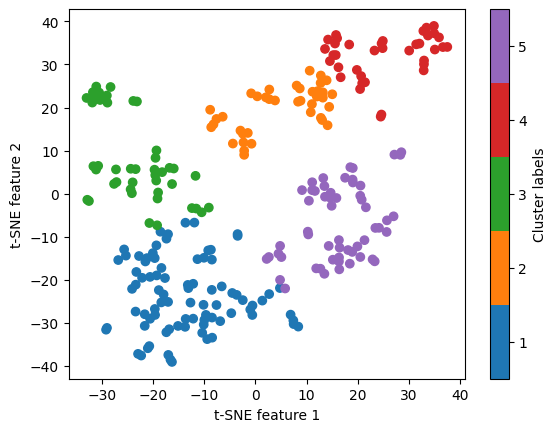

In [35]:
def kmeans_plot(embedding_dataset, cluster_names=None, n_clusters=None, init="k-means++", n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm="auto"):
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter, tol=tol, verbose=verbose, random_state=random_state, copy_x=copy_x, algorithm=algorithm)
    np.set_printoptions(suppress=True)
    Y = kmeans.fit_predict(embedding_dataset)

    # Create a colormap with only 'n_clusters' colors
    base_cmap = plt.get_cmap("tab10")
    colors = base_cmap(np.linspace(0, 1, 10))
    cmap = ListedColormap(colors[:n_clusters])

    plt.scatter(embedding_dataset[:, 0], embedding_dataset[:, 1], c=Y, cmap=cmap)
    plt.xlabel("t-SNE feature 1")
    plt.ylabel("t-SNE feature 2")

    # Normalize and create colorbar
    norm = Normalize(vmin=0, vmax=n_clusters)
    mappable = ScalarMappable(norm=norm, cmap=cmap)
    cbar = plt.colorbar(mappable, ax=plt.gca(), label="Cluster labels")

    # Set custom tick positions and labels for the colorbar
    tick_positions = np.arange(n_clusters) + 0.5
    cbar.set_ticks(tick_positions)
    if cluster_names is not None and len(cluster_names) == n_clusters:
        cbar.set_ticklabels(cluster_names)
    else:
        cbar.set_ticklabels(np.arange(1, n_clusters + 1))

    return Y


cluster_label = kmeans_plot(projected_embedding, n_clusters=5)